In [10]:
from src.lib.mapmatching import MapMatching
from src.lib.visualizer import Visualizer
from src.type import PositionWithTimestamp, Position
from logging import getLogger
import time

In [11]:
logger = getLogger(__name__)

map_matching = MapMatching("UNUSED", logger)
visualizer = Visualizer("UNUSED", logger)

In [ ]:
points: list[PositionWithTimestamp] = [
    PositionWithTimestamp(22.01, -1.16, 0, 0.0),
    PositionWithTimestamp(22.00, -1.66, 0, 0.5),
    PositionWithTimestamp(21.80, -2.16, 0, 1.0),
    PositionWithTimestamp(21.60, -2.66, 0, 1.5),
    PositionWithTimestamp(21.40, -3.16, 0, 2.0),
    PositionWithTimestamp(21.20, -3.66, 0, 2.5),
    PositionWithTimestamp(21.00, -4.16, 0, 3.0),
    PositionWithTimestamp(20.80, -4.66, 0, 3.5),
    PositionWithTimestamp(20.60, -5.16, 0, 4.0),
    PositionWithTimestamp(20.40, -5.66, 0, 4.5),
    PositionWithTimestamp(20.20, -6.16, 0, 5.0),
    PositionWithTimestamp(20.00, -6.66, 0, 5.5),
    PositionWithTimestamp(19.80, -7.16, 0, 6.0),
    PositionWithTimestamp(19.60, -7.66, 0, 6.5),
    PositionWithTimestamp(19.40, -8.16, 0, 7.0),
    PositionWithTimestamp(19.20, -8.66, 0, 7.5),
    PositionWithTimestamp(19.00, -9.16, 0, 8.0),
    PositionWithTimestamp(18.80, -9.66, 0, 8.5),
    PositionWithTimestamp(18.60, -10.16, 0, 9.0),
    PositionWithTimestamp(18.40, -10.66, 0, 9.5),
    PositionWithTimestamp(18.20, -10.32, 0, 15.5), 
    PositionWithTimestamp(18.00, -9.98, 0, 16.0),
    PositionWithTimestamp(17.60, -10.00, 0, 16.5),
    PositionWithTimestamp(17.20, -10.02, 0, 17.0),
    PositionWithTimestamp(16.80, -10.04, 0, 17.5),
    PositionWithTimestamp(16.40, -10.06, 0, 18.0),
    PositionWithTimestamp(16.00, -10.08, 0, 18.5),
    PositionWithTimestamp(15.60, -10.10, 0, 19.0),
    PositionWithTimestamp(15.20, -10.00, 0, 19.5),
    PositionWithTimestamp(14.80, -9.90, 0, 20.0),
    PositionWithTimestamp(14.40, -9.80, 0, 20.5),
    PositionWithTimestamp(14.00, -9.70, 0, 21.0),
    PositionWithTimestamp(13.60, -9.60, 0, 27.0),
    PositionWithTimestamp(13.20, -9.50, 0, 27.5),
    PositionWithTimestamp(12.80, -9.20, 0, 28.0),
    PositionWithTimestamp(12.40, -8.90, 0, 28.5),
    PositionWithTimestamp(12.00, -8.60, 0, 29.0),
    PositionWithTimestamp(11.90, -8.30, 0, 29.5),
    PositionWithTimestamp(11.90, -7.90, 0, 30.0),
    PositionWithTimestamp(12.00, -7.50, 0, 30.5),
    PositionWithTimestamp(12.30, -7.10, 0, 31.0),
    PositionWithTimestamp(12.60, -6.70, 0, 31.5),
    PositionWithTimestamp(12.90, -6.30, 0, 32.0),
    PositionWithTimestamp(12.70, -6.10, 0, 32.5),
    PositionWithTimestamp(12.50, -5.90, 0, 33.0),
    PositionWithTimestamp(12.20, -5.70, 0, 33.5),
    PositionWithTimestamp(11.90, -5.50, 0, 34.0),
    PositionWithTimestamp(11.60, -5.30, 0, 44.5),
    PositionWithTimestamp(11.30, -5.10, 0, 45.0),
    PositionWithTimestamp(11.00, -4.90, 0, 45.5),
    PositionWithTimestamp(10.70, -5.10, 0, 46.0),
    PositionWithTimestamp(10.40, -5.40, 0, 46.5),
    PositionWithTimestamp(10.10, -5.70, 0, 47.0),
    PositionWithTimestamp(9.80, -6.00, 0, 47.5),
    PositionWithTimestamp(9.50, -6.30, 0, 48.0),
    
    
    
    PositionWithTimestamp(9.20, -7.10, 0, 48.5),
    PositionWithTimestamp(8.90, -6.90, 0, 49.0),
    PositionWithTimestamp(8.60, -6.70, 0, 49.5),
    PositionWithTimestamp(8.30, -6.50, 0, 50.0),
    PositionWithTimestamp(8.00, -6.30, 0, 50.5),
    PositionWithTimestamp(7.70, -6.10, 0, 51.0),
    PositionWithTimestamp(7.40, -5.90, 0, 51.5),
    PositionWithTimestamp(7.10, -5.70, 0, 52.0),
    PositionWithTimestamp(6.80, -5.50, 0, 52.5),
    PositionWithTimestamp(6.50, -5.30, 0, 53.0),
    PositionWithTimestamp(6.20, -5.10, 0, 53.5),
    PositionWithTimestamp(5.90, -4.90, 0, 54.0),
    PositionWithTimestamp(5.60, -4.70, 0, 54.5),
    PositionWithTimestamp(5.30, -4.50, 0, 55.0),
    PositionWithTimestamp(5.10, -3.90, 0, 55.5),
    PositionWithTimestamp(5.00, -3.50, 0, 55.5),
    
    PositionWithTimestamp(5.00, -3.30, 0, 55.5),
    PositionWithTimestamp(5.20, -2.90, 0, 56.0),
    PositionWithTimestamp(5.40, -2.50, 0, 56.5),
    PositionWithTimestamp(5.60, -2.10, 0, 57.0),
    PositionWithTimestamp(5.80, -1.70, 0, 57.5),
    PositionWithTimestamp(6.00, -1.30, 0, 58.0),
    PositionWithTimestamp(6.20, -0.90, 0, 58.5),
    PositionWithTimestamp(6.40, -0.50, 0, 59.0),
    PositionWithTimestamp(6.60, -0.10, 0, 59.5),
    PositionWithTimestamp(6.80, 0.30, 0, 60.0),
    PositionWithTimestamp(7.00, 0.70, 0, 60.5),


]

# 補正後のpoints
correction_points = map_matching.map_matching(points)

datetime = time.strftime("%Y%m%d_%H%M%S")

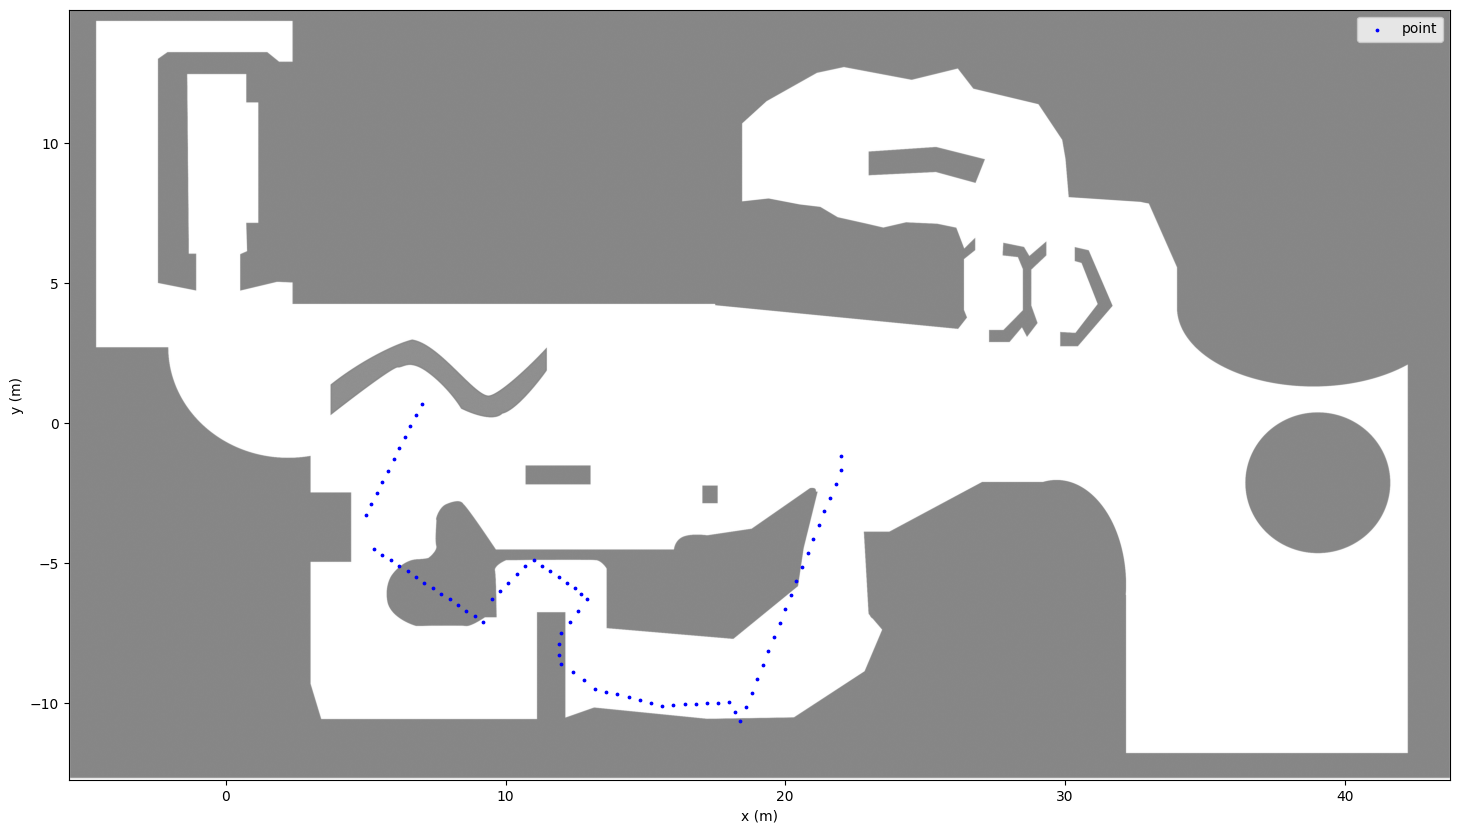

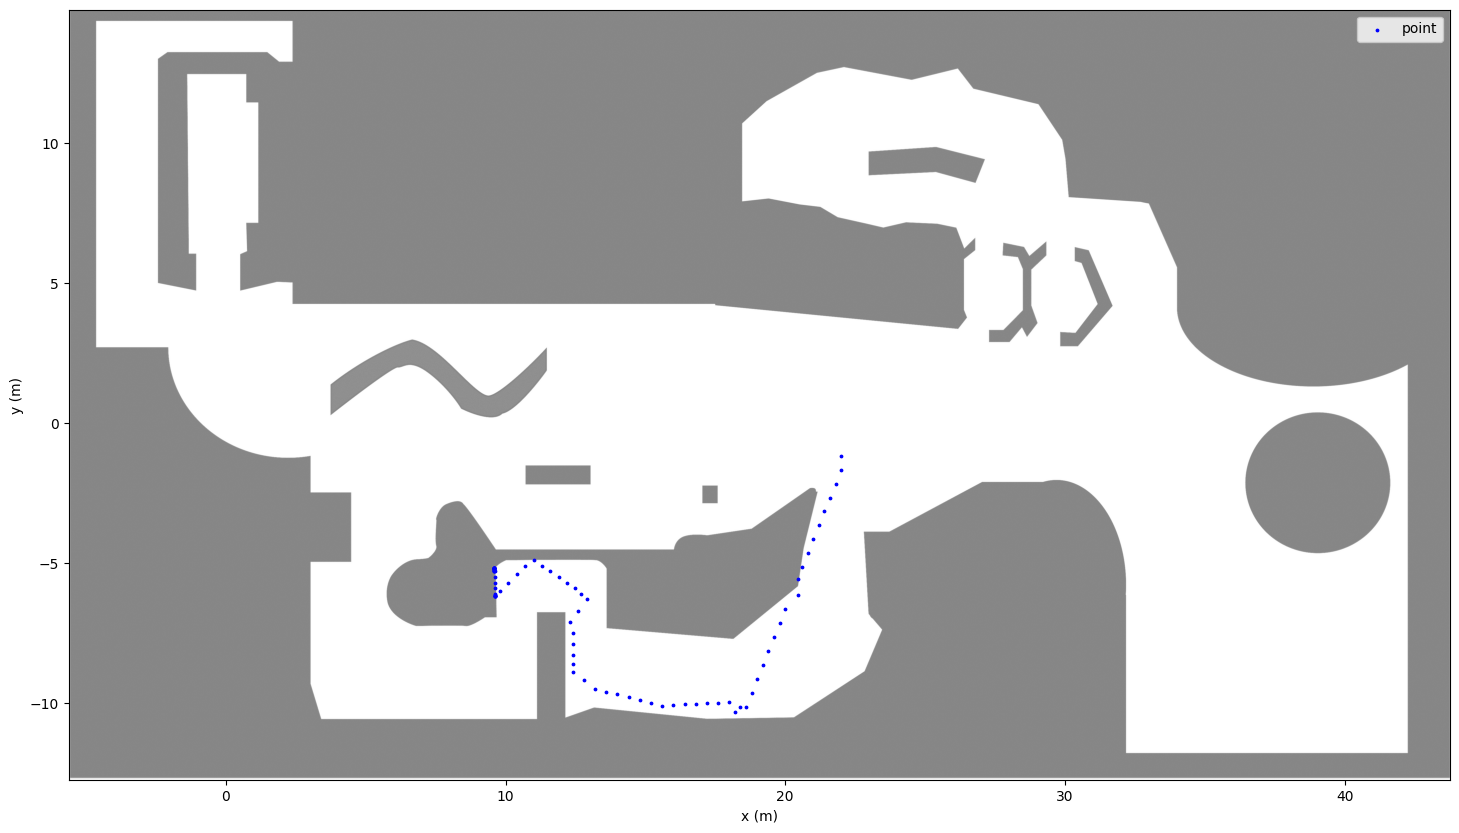

In [13]:
# 補正前
visualizer.plot_map_for_mapmatching([Position(p.x, p.y, p.z) for p in points], f"zzz/{datetime}_before.png")

# 補正後
visualizer.plot_map_for_mapmatching(correction_points, f"zzz/{datetime}_after.png")
